In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("youtube_channel_real_performance_analytics.csv")

In [8]:
df.head(5)

,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [10]:
df.shape

(364, 70)

In [12]:
df.columns

Index(['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish',
       'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)',
       'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)',
       'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)',
       'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)',
       'Watch Page Ads Revenue (USD)', 'YouTube Premium (USD)',
       'Transaction Revenue (USD)', 'Transactions',
       'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count',
       'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count',
       'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)',
       'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers',
       'Returned Items (USD)', 'Unconfirmed Commissions (USD)',
       'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)',
       'End Screen Click-Through Rate (%)', 'End Screen Impressions',
       'End Screen Clicks', 

In [13]:
df.dtypes.value_counts()

float64    63
int64       5
object      2
Name: count, dtype: int64

In [14]:
df.isnull().sum().sort_values(ascending=False).head(20)

ID                                   0
Teaser Impressions                   0
Playlist Views                       0
Views per Playlist Start             0
Card Clicks                          0
Card Impressions                     0
Card Click-Through Rate (%)          0
Teaser Clicks                        0
Teaser Click-Through Rate (%)        0
Clip Watch Time (hours)              0
End Screen Clicks                    0
End Screen Impressions               0
End Screen Click-Through Rate (%)    0
Total Sales Volume (USD)             0
Orders                               0
Approved Commissions (USD)           0
Playlist Watch Time (hours)          0
Clip Views                           0
Video Duration                       0
Average View Percentage (%)          0
dtype: int64

,count,mean,std,min,25%,50%,75%,max
ID,364.0,181.500000,1.052220e+02,0.0000,90.75000,181.50000,2.722500e+02,3.630000e+02
Video Duration,364.0,664.239011,3.306462e+02,9.0000,496.00000,613.00000,7.865000e+02,2.311000e+03
Days Since Publish,364.0,8.406593,1.537124e+01,0.0000,3.00000,5.00000,9.000000e+00,2.600000e+02
Day,364.0,15.807692,8.924004e+00,1.0000,8.00000,16.00000,2.300000e+01,3.100000e+01
Month,364.0,6.642857,3.421521e+00,1.0000,4.00000,7.00000,1.000000e+01,1.200000e+01
...,...,...,...,...,...,...,...,...
Watch Time (hours),364.0,10058.965455,9.516160e+03,12.6979,2759.40425,8102.96295,1.408450e+04,5.379466e+04
Subscribers,364.0,321.024725,4.445948e+02,-3.0000,41.00000,180.00000,4.212500e+02,3.728000e+03
Estimated Revenue (USD),364.0,8.852052,1.341465e+01,0.0000,0.44325,4.28500,1.147625e+01,1.031170e+02
Impressions,364.0,959528.618132,1.180519e+06,32228.0000,131708.25000,620406.50000,1.368464e+06,1.270226e+07


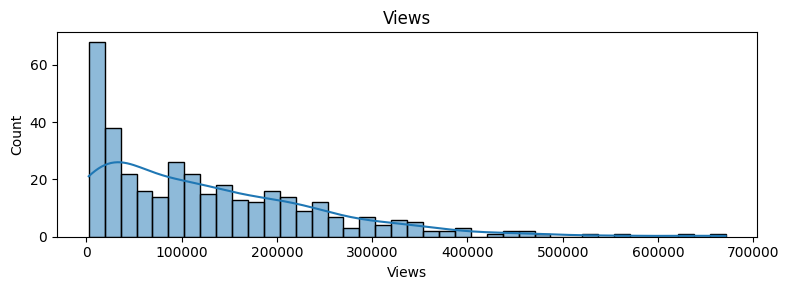

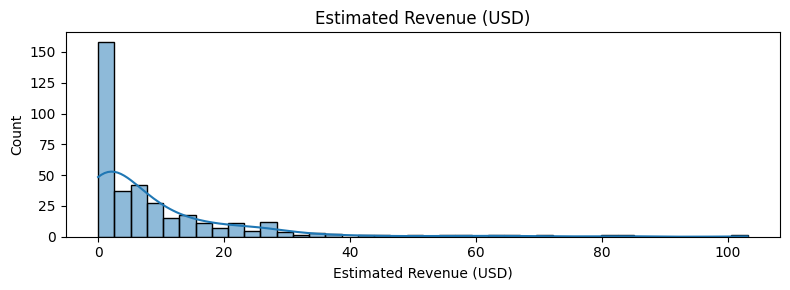

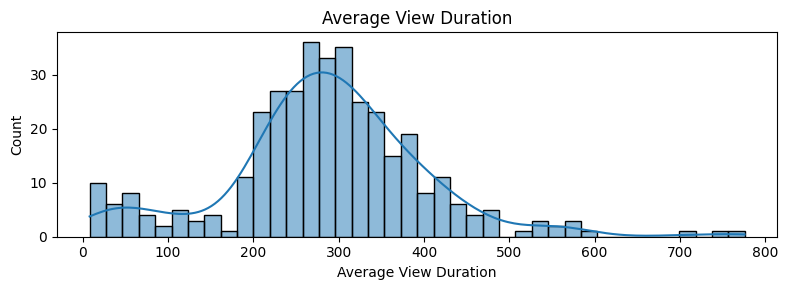

In [16]:
num = df.select_dtypes(include=[np.number])
display(num.describe().T)

# plot distributions for key columns
cols = ['Views', 'Estimated Revenue (USD)', 'Average View Duration', 'Video Duration Seconds']
for c in cols:
    if c in df.columns:
        plt.figure(figsize=(8,3))
        sns.histplot(df[c].dropna(), bins=40, kde=True)
        plt.title(c)
        plt.tight_layout()
        plt.show()


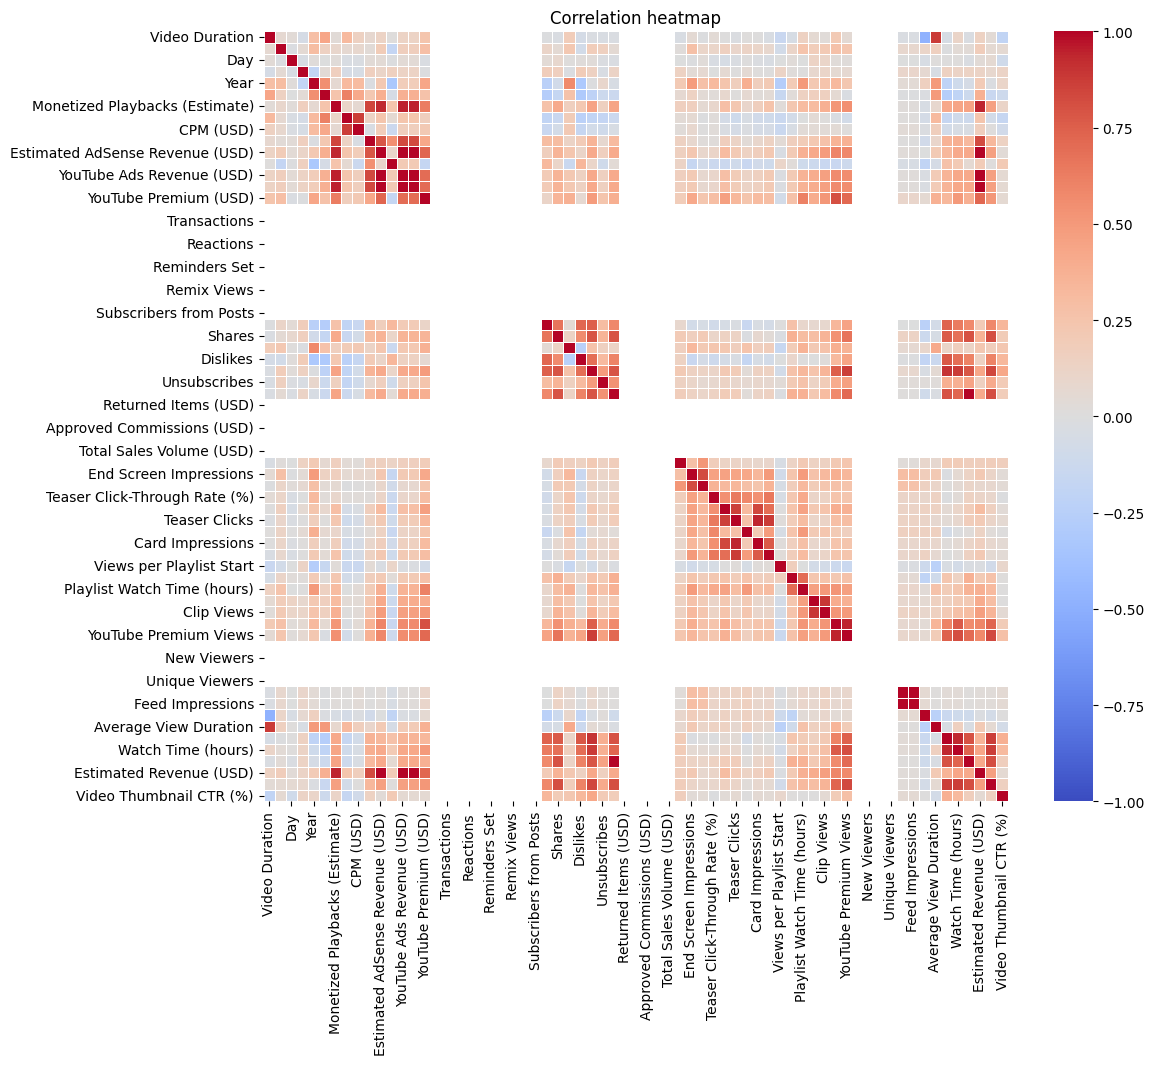

In [17]:
# keep a manageable number of numeric columns for heatmap
numeric = num.copy()
# remove ID-like columns if present
for drop_col in ['ID']:
    if drop_col in numeric.columns:
        numeric = numeric.drop(columns=[drop_col])

plt.figure(figsize=(12,10))
corr = numeric.corr()
sns.heatmap(corr, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0, square=False, linewidths=.5)
plt.title("Correlation heatmap")
plt.show()


In [21]:
# Top by estimated revenue
if 'Estimated Revenue (USD)' in df.columns:
    display(df.sort_values('Estimated Revenue (USD)', ascending=False)[['ID','Views','Subscribers','Estimated Revenue (USD)']].head(10))

# Group analyses: average revenue by day-of-week
if 'Publish_DOW' in df.columns and 'Estimated Revenue (USD)' in df.columns:
    display(df.groupby('Publish_DOW')['Estimated Revenue (USD)'].mean().sort_values(ascending=False))


,ID,Views,Subscribers,Estimated Revenue (USD)
228,228,670990.0,3538.0,103.117
257,257,241060.0,1125.0,83.979
251,251,343319.0,1437.0,80.265
289,289,99196.0,350.0,70.247
278,278,188324.0,1824.0,65.978
260,260,302999.0,866.0,62.047
293,293,101025.0,602.0,59.058
294,294,67556.0,581.0,55.040
290,290,89284.0,995.0,50.344
284,284,93487.0,305.0,44.228


In [50]:
# Engagement Rate
if {'Likes', 'Shares', 'Comments', 'Views'}.issubset(df.columns):
    df['Engagement Rate (%)'] = ((df['Likes'] + df['Shares'] + df['Comments']) / df['Views']) * 100

# Revenue per View
if {'Estimated Revenue (USD)', 'Views'}.issubset(df.columns):
    df['Revenue per View'] = df['Estimated Revenue (USD)'] / df['Views']

# Day of week
if 'Video Publish Time' in df.columns:
    # Convert to datetime if not already
    df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'], errors='coerce')
    
    # Extract day name
    df['Publish Day'] = df['Video Publish Time'].dt.day_name()

df[['Video Publish Time', 'Publish Day']].head()



,Video Publish Time,Publish Day
0,2016-06-02,Thursday
1,2016-06-10,Friday
2,2016-06-14,Tuesday
3,2016-06-29,Wednesday
4,2016-07-01,Friday


In [40]:

# Select features and target
target = 'Estimated Revenue (USD)'
features = [col for col in ['Views', 'Subscribers', 'Likes', 'Shares', 
                            'Comments', 'Engagement Rate (%)', 'Video Duration Seconds'] 
            if col in df.columns]

print("Selected Features:", features)

data = df[features + [target]].dropna()
X = data[features]
y = data[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Model Performance:\nMSE: {mse:.2f}\nR² Score: {r2:.2f}")


Selected Features: ['Views', 'Subscribers', 'Likes', 'Shares']
Model Performance:
MSE: 110.49
R² Score: -0.27


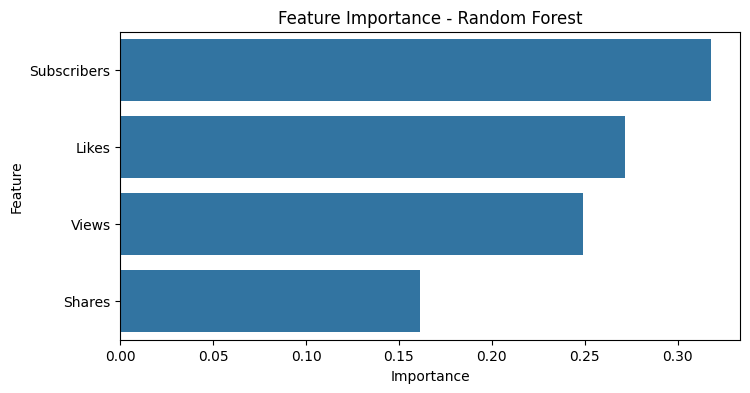

In [39]:
# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Feature Importance - Random Forest")
plt.show()


In [52]:
data.to_csv('cleaned_youtube_data.csv', index=False)
print(" Cleaned dataset saved as 'cleaned_youtube_data.csv'")


 Cleaned dataset saved as 'cleaned_youtube_data.csv'
